# Q1. Introduction.

## Problem Statement
*An E Commerce company or DTH (you can choose either of these two domains) provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.

*You have been assigned to develop a churn prediction model for this company and provide business recommendations on the campaign.

*Your campaign suggestion should be unique and be very clear on the campaign offer because your recommendation will go through the revenue assurance team. If they find that you are giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going to approve your recommendation. Hence be very careful while providing campaign recommendation.

## Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install termcolor

In [3]:
from termcolor import colored

In [4]:
from IPython.display import display

In [5]:
df_original = pd.read_excel('Customer+Churn+Data.xlsx')

In [6]:
df_original.duplicated().sum()

0

In [7]:
df_original.head(10).T

,0,1,2,3,4,5,6,7,8,9
AccountID,20000,20001,20002,20003,20004,20005,20006,20007,20008,20009
Churn,1,1,1,1,1,1,1,1,1,1
Tenure,4,0,0,0,0,0,2,0,13,0
City_Tier,3.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,3.0,1.0
CC_Contacted_LY,6.0,8.0,30.0,15.0,12.0,22.0,11.0,6.0,9.0,31.0
Payment,Debit Card,UPI,Debit Card,Debit Card,Credit Card,Debit Card,Cash on Delivery,Credit Card,E wallet,Debit Card
Gender,Female,Male,Male,Male,Male,Female,Male,Male,Male,Male
Service_Score,3.0,3.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0
Account_user_count,3,4,4,4,3,NaN,3,3,4,5
account_segment,Super,Regular Plus,Regular Plus,Super,Regular Plus,Regular Plus,Super,Regular Plus,Regular Plus,Regular Plus


In [8]:
df=df_original.drop('AccountID',axis=1)

In [9]:
df.head(10)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
5,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139.19,Computer
6,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,120.86,Mobile
7,1,0,1.0,6.0,Credit Card,Male,3.0,3,Regular Plus,2.0,Divorced,3,1.0,16,2,0,122.93,Mobile
8,1,13,3.0,9.0,E wallet,Male,2.0,4,Regular Plus,3.0,Divorced,2,1.0,14,0,2,126.83,Mobile
9,1,0,1.0,31.0,Debit Card,Male,2.0,5,Regular Plus,3.0,Single,2,0.0,12,1,1,122.93,Mobile


In [10]:
df.shape

(11260, 18)

In [11]:
df.columns = [str(x).lower() for x in df.columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   churn                    11260 non-null  int64  
 1   tenure                   11158 non-null  object 
 2   city_tier                11148 non-null  float64
 3   cc_contacted_ly          11158 non-null  float64
 4   payment                  11151 non-null  object 
 5   gender                   11152 non-null  object 
 6   service_score            11162 non-null  float64
 7   account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   cc_agent_score           11144 non-null  float64
 10  marital_status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [13]:
df.describe()

,churn,city_tier,cc_contacted_ly,service_score,cc_agent_score,complain_ly
count,11260.000000,11148.000000,11158.000000,11162.000000,11144.000000,10903.000000
mean,0.168384,1.653929,17.867091,2.902526,3.066493,0.285334
std,0.374223,0.915015,8.853269,0.725584,1.379772,0.451594
min,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


### List Unique Entries in Each Feature

In [14]:
for i in df.columns:
    print('Feature:',i)
    print('List of Unique Entries:',df[i].unique())
    print('-----------------------------------------------------')

Feature: churn
List of Unique Entries: [1 0]
-----------------------------------------------------
Feature: tenure
List of Unique Entries: [4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61]
-----------------------------------------------------
Feature: city_tier
List of Unique Entries: [ 3.  1. nan  2.]
-----------------------------------------------------
Feature: cc_contacted_ly
List of Unique Entries: [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  nan  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41.
 132.  43. 129.]
-----------------------------------------------------
Feature: payment
List of Unique Entries: ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]
-----------------------------------------------------
Feature: gender
List of Unique Entries: ['Female' 'Male' 'F' nan 'M']
-------------

In [15]:
df=df.replace(['#','@','+','$','*','&&&&'],np.NaN)

In [16]:
df.gender=df.gender.replace(['F','M'],['Female','Male'])

In [17]:
df.gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [18]:
df.account_segment=df.account_segment.replace(['Regular +','Super +'],['Regular Plus','Super Plus'])

In [19]:
df.account_segment.unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', nan, 'Super Plus'],
      dtype=object)

In [20]:
for i in df.columns:
    print('Feature:',i)
    print('List of Unique Entries:',df[i].unique())
    print('------------------------------------------------------------------')

Feature: churn
List of Unique Entries: [1 0]
------------------------------------------------------------------
Feature: tenure
List of Unique Entries: [ 4.  0.  2. 13. 11. nan  9. 99. 19. 20. 14.  8. 26. 18.  5. 30.  7.  1.
 23.  3. 29.  6. 28. 24. 25. 16. 10. 15. 22. 27. 12. 21. 17. 50. 60. 31.
 51. 61.]
------------------------------------------------------------------
Feature: city_tier
List of Unique Entries: [ 3.  1. nan  2.]
------------------------------------------------------------------
Feature: cc_contacted_ly
List of Unique Entries: [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  nan  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41.
 132.  43. 129.]
------------------------------------------------------------------
Feature: payment
List of Unique Entries: ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]
-----------------------------------------

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   churn                    11260 non-null  int64  
 1   tenure                   11042 non-null  float64
 2   city_tier                11148 non-null  float64
 3   cc_contacted_ly          11158 non-null  float64
 4   payment                  11151 non-null  object 
 5   gender                   11152 non-null  object 
 6   service_score            11162 non-null  float64
 7   account_user_count       10816 non-null  float64
 8   account_segment          11163 non-null  object 
 9   cc_agent_score           11144 non-null  float64
 10  marital_status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [22]:
pd.DataFrame(df.nunique(),columns=['No.of Unique Entries']).rename_axis(index='Features')

,No.of Unique Entries
Features,
churn,2
tenure,37
city_tier,3
cc_contacted_ly,44
payment,5
gender,2
service_score,6
account_user_count,6
account_segment,5


In [23]:
num=['tenure','cc_contacted_ly','rev_per_month','rev_growth_yoy','coupon_used_for_payment','day_since_cc_connect',
     'cashback']
num

['tenure',
 'cc_contacted_ly',
 'rev_per_month',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'day_since_cc_connect',
 'cashback']

In [24]:
cat=df.columns.drop(num)
cat=cat.drop('churn')
cat

Index(['city_tier', 'payment', 'gender', 'service_score', 'account_user_count',
       'account_segment', 'cc_agent_score', 'marital_status', 'complain_ly',
       'login_device'],
      dtype='object')

In [25]:
df[num].describe().round(1)

,tenure,cc_contacted_ly,rev_per_month,rev_growth_yoy,coupon_used_for_payment,day_since_cc_connect,cashback
count,11042.0,11158.0,10469.0,11257.0,11257.0,10902.0,10787.0
mean,11.0,17.9,6.4,16.2,1.8,4.6,196.2
std,12.9,8.9,11.9,3.8,2.0,3.7,178.7
min,0.0,4.0,1.0,4.0,0.0,0.0,0.0
25%,2.0,11.0,3.0,13.0,1.0,2.0,147.2
50%,9.0,16.0,5.0,15.0,1.0,3.0,165.2
75%,16.0,23.0,7.0,19.0,2.0,8.0,200.0
max,99.0,132.0,140.0,28.0,16.0,47.0,1997.0


In [26]:
#df[num].describe().to_excel('num_describe.xlsx')

In [27]:
df[cat].astype('object').describe().T

,count,unique,top,freq
city_tier,11148.0,3.0,1.0,7263.0
payment,11151,5,Debit Card,4587
gender,11152,2,Male,6704
service_score,11162.0,6.0,3.0,5490.0
account_user_count,10816.0,6.0,4.0,4569.0
account_segment,11163,5,Regular Plus,4124
cc_agent_score,11144.0,5.0,3.0,3360.0
marital_status,11048,3,Married,5860
complain_ly,10903.0,2.0,0.0,7792.0
login_device,10500,2,Mobile,7482


In [28]:
# cat_describe = df[cat].astype('object').describe().T
# cat_describe.to_excel('cat_describe.xlsx')

In [29]:
df.churn.value_counts(normalize=True)*100

0    83.161634
1    16.838366
Name: churn, dtype: float64

# Q2. EDA and Business Implication

## Univariate Analysis

In [30]:
sns.set(font_scale = 1.5);
sns.set_palette("tab10")

### Continous Variables

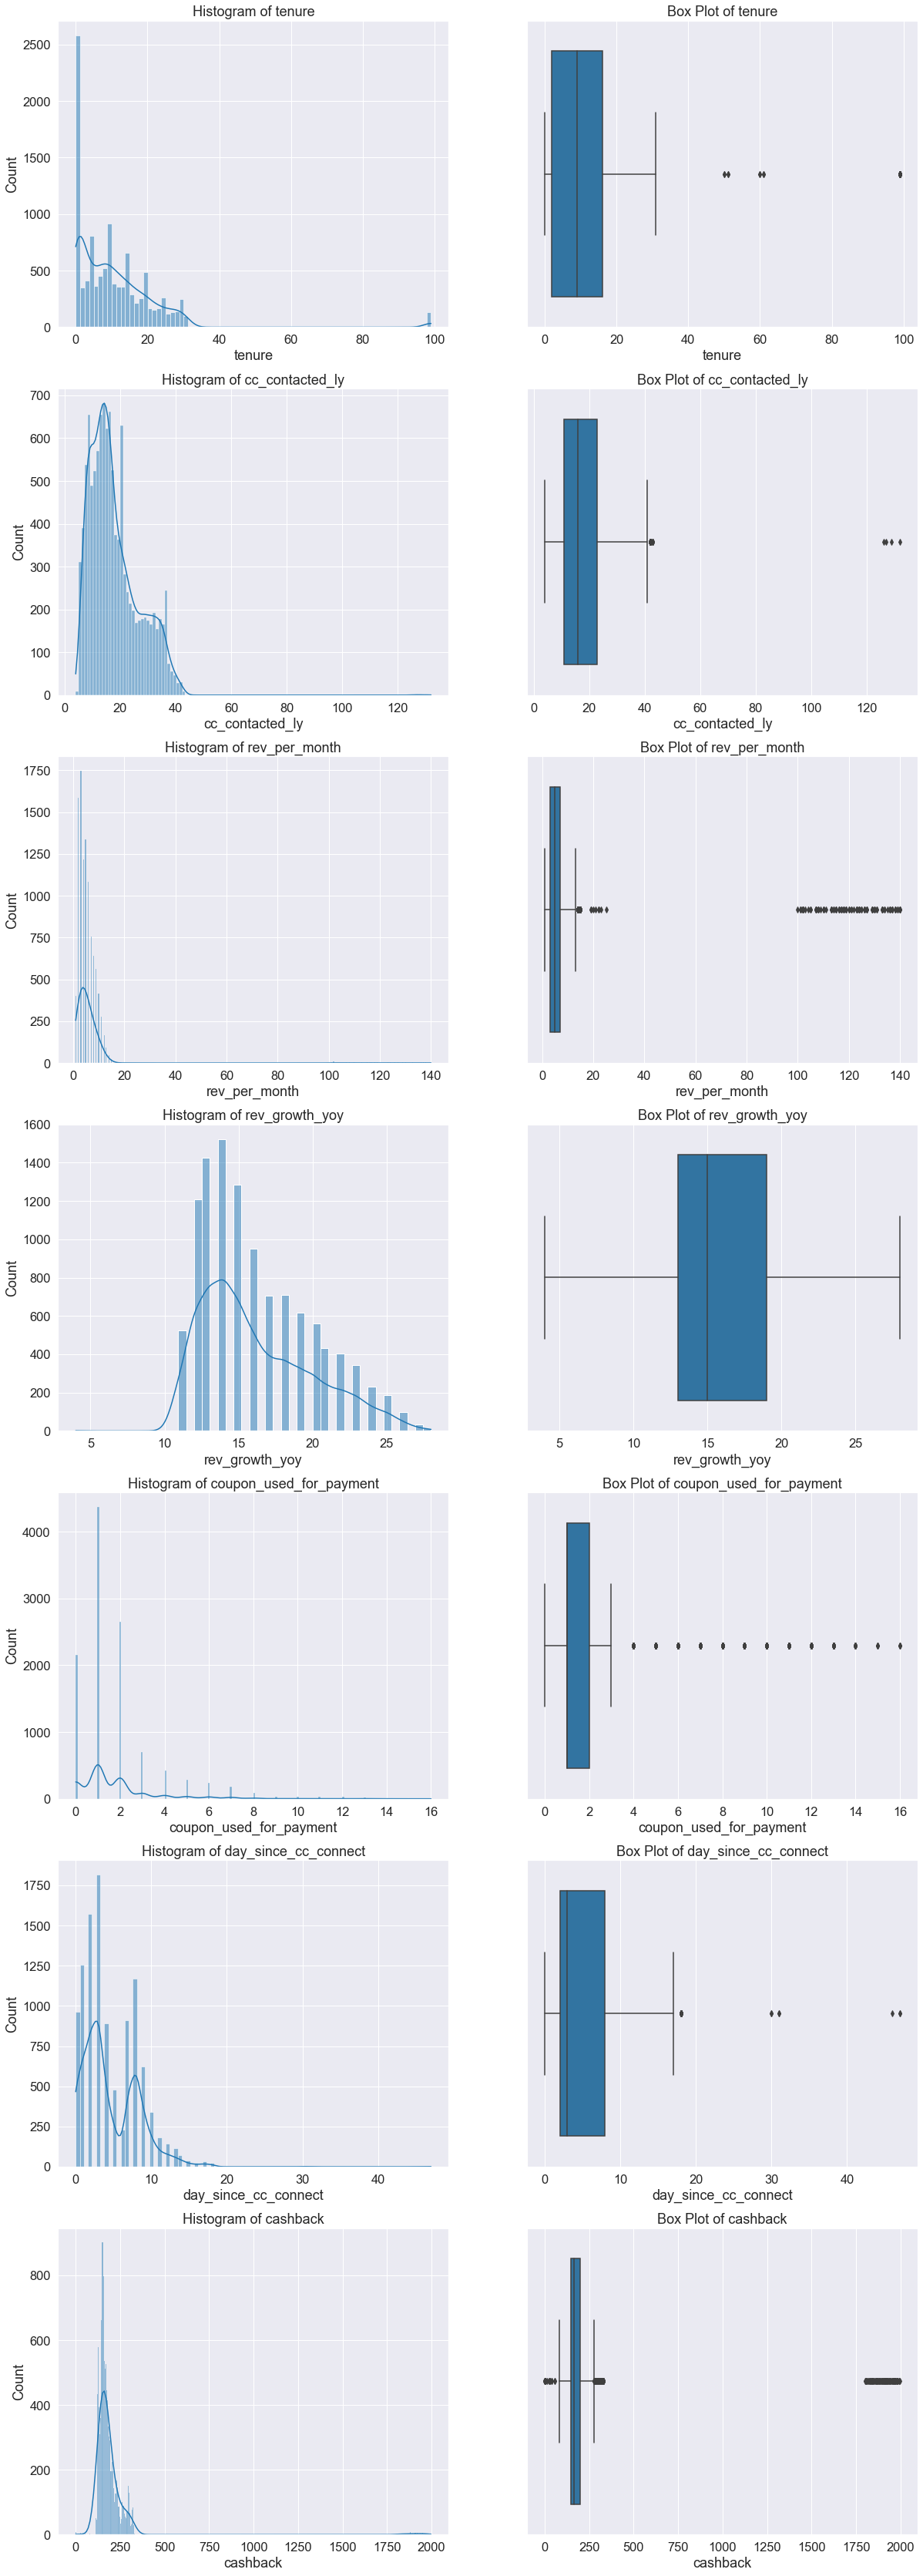

In [31]:
plt.figure(figsize=(20,60))
j=1
for i in num:
    plt.subplot(len(num),2,j)
    sns.histplot(df[i],kde=True);
    plt.title('Histogram of '+i)
    k=j+1
    plt.subplot(len(num),2,k)
    sns.boxplot(df[i]);
    plt.title('Box Plot of '+i)
    j=k+1

### Skewness and Kurtosis

In [32]:
pd.DataFrame([df[num].skew(),df[num].kurtosis()],index=['Skewness','kurtosis']).rename_axis(index='Feature').T.round(2)

Feature,Skewness,kurtosis
tenure,3.90,23.37
cc_contacted_ly,1.42,8.23
rev_per_month,9.09,86.96
rev_growth_yoy,0.75,-0.22
coupon_used_for_payment,2.58,9.10
day_since_cc_connect,1.27,5.33
cashback,8.77,81.11


In [33]:
# skew = pd.DataFrame([df[num].skew(),df[num].kurtosis()],index=['Skewness','kurtosis']).rename_axis(index='Feature').T
# skew.to_excel('skew.xlsx')

### Categorical Variables

In [34]:
len(cat)

10

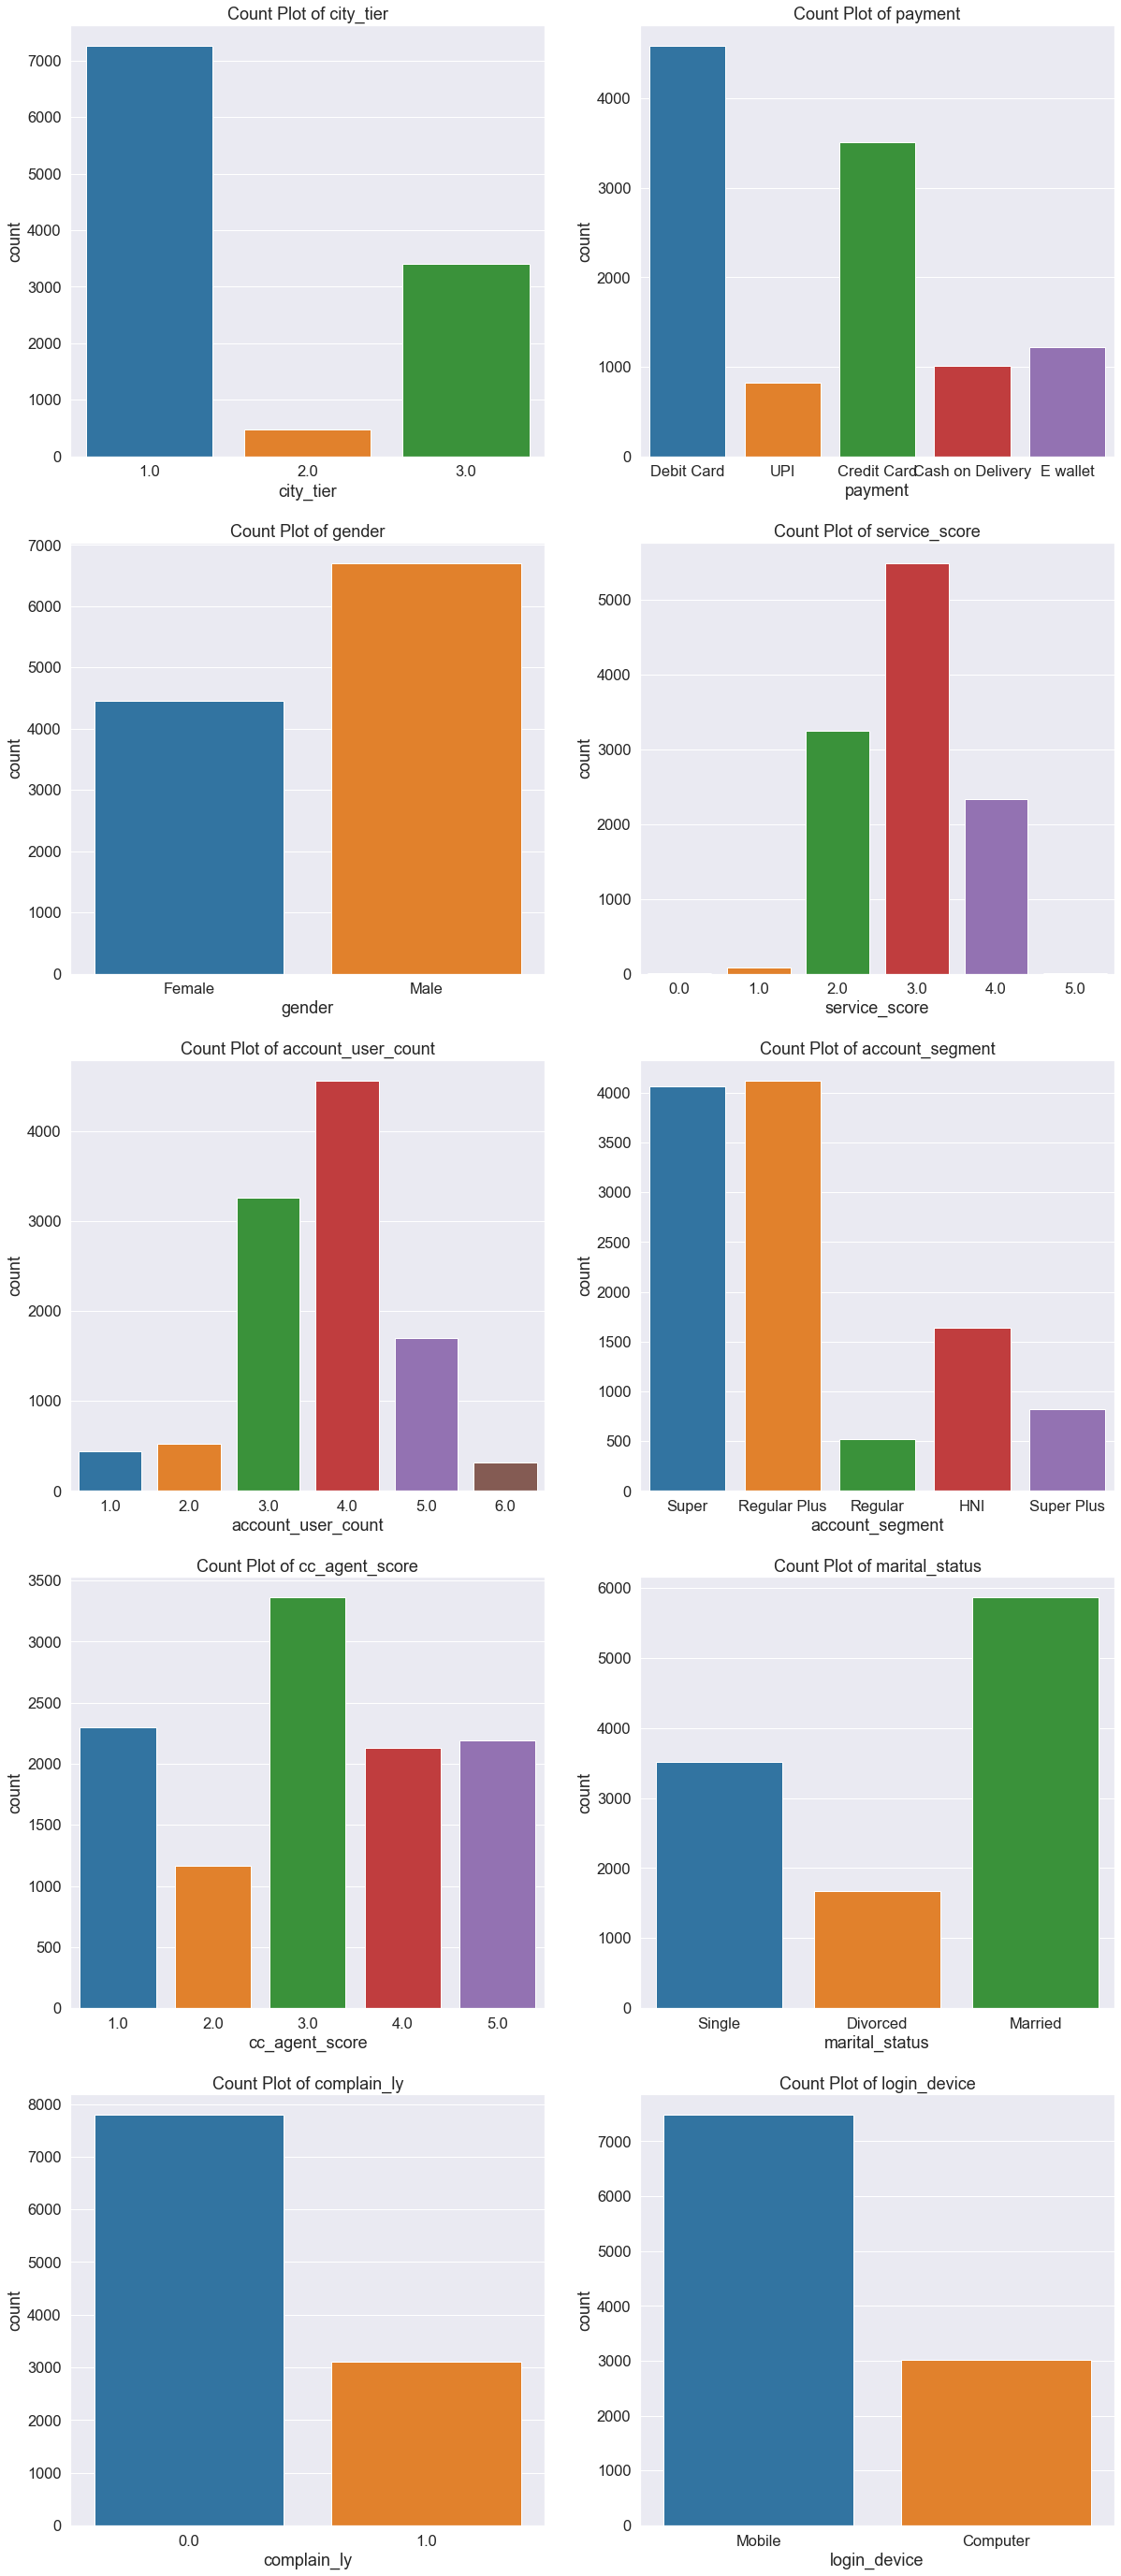

In [35]:
plt.figure(figsize=(20,100))
j=1
for i in cat:
    plt.subplot(10,2,j)
    sns.countplot(df[i]);
    plt.title('Count Plot of '+i)
    j=j+1

In [36]:
for i in cat:
    print('Feature:',i)
    display(pd.DataFrame(df[i].value_counts(normalize=True).round(2))*100)
    print('-------------------------------')

Feature: city_tier


,city_tier
1.0,65.0
3.0,31.0
2.0,4.0


-------------------------------
Feature: payment


,payment
Debit Card,41.0
Credit Card,31.0
E wallet,11.0
Cash on Delivery,9.0
UPI,7.0


-------------------------------
Feature: gender


,gender
Male,60.0
Female,40.0


-------------------------------
Feature: service_score


,service_score
3.0,49.0
2.0,29.0
4.0,21.0
1.0,1.0
0.0,0.0
5.0,0.0


-------------------------------
Feature: account_user_count


,account_user_count
4.0,42.0
3.0,30.0
5.0,16.0
2.0,5.0
1.0,4.0
6.0,3.0


-------------------------------
Feature: account_segment


,account_segment
Regular Plus,37.0
Super,36.0
HNI,15.0
Super Plus,7.0
Regular,5.0


-------------------------------
Feature: cc_agent_score


,cc_agent_score
3.0,30.0
1.0,21.0
5.0,20.0
4.0,19.0
2.0,10.0


-------------------------------
Feature: marital_status


,marital_status
Married,53.0
Single,32.0
Divorced,15.0


-------------------------------
Feature: complain_ly


,complain_ly
0.0,71.0
1.0,29.0


-------------------------------
Feature: login_device


,login_device
Mobile,71.0
Computer,29.0


-------------------------------


## Bivariate analysis

### Count of Categorical Features with Churn as Hue

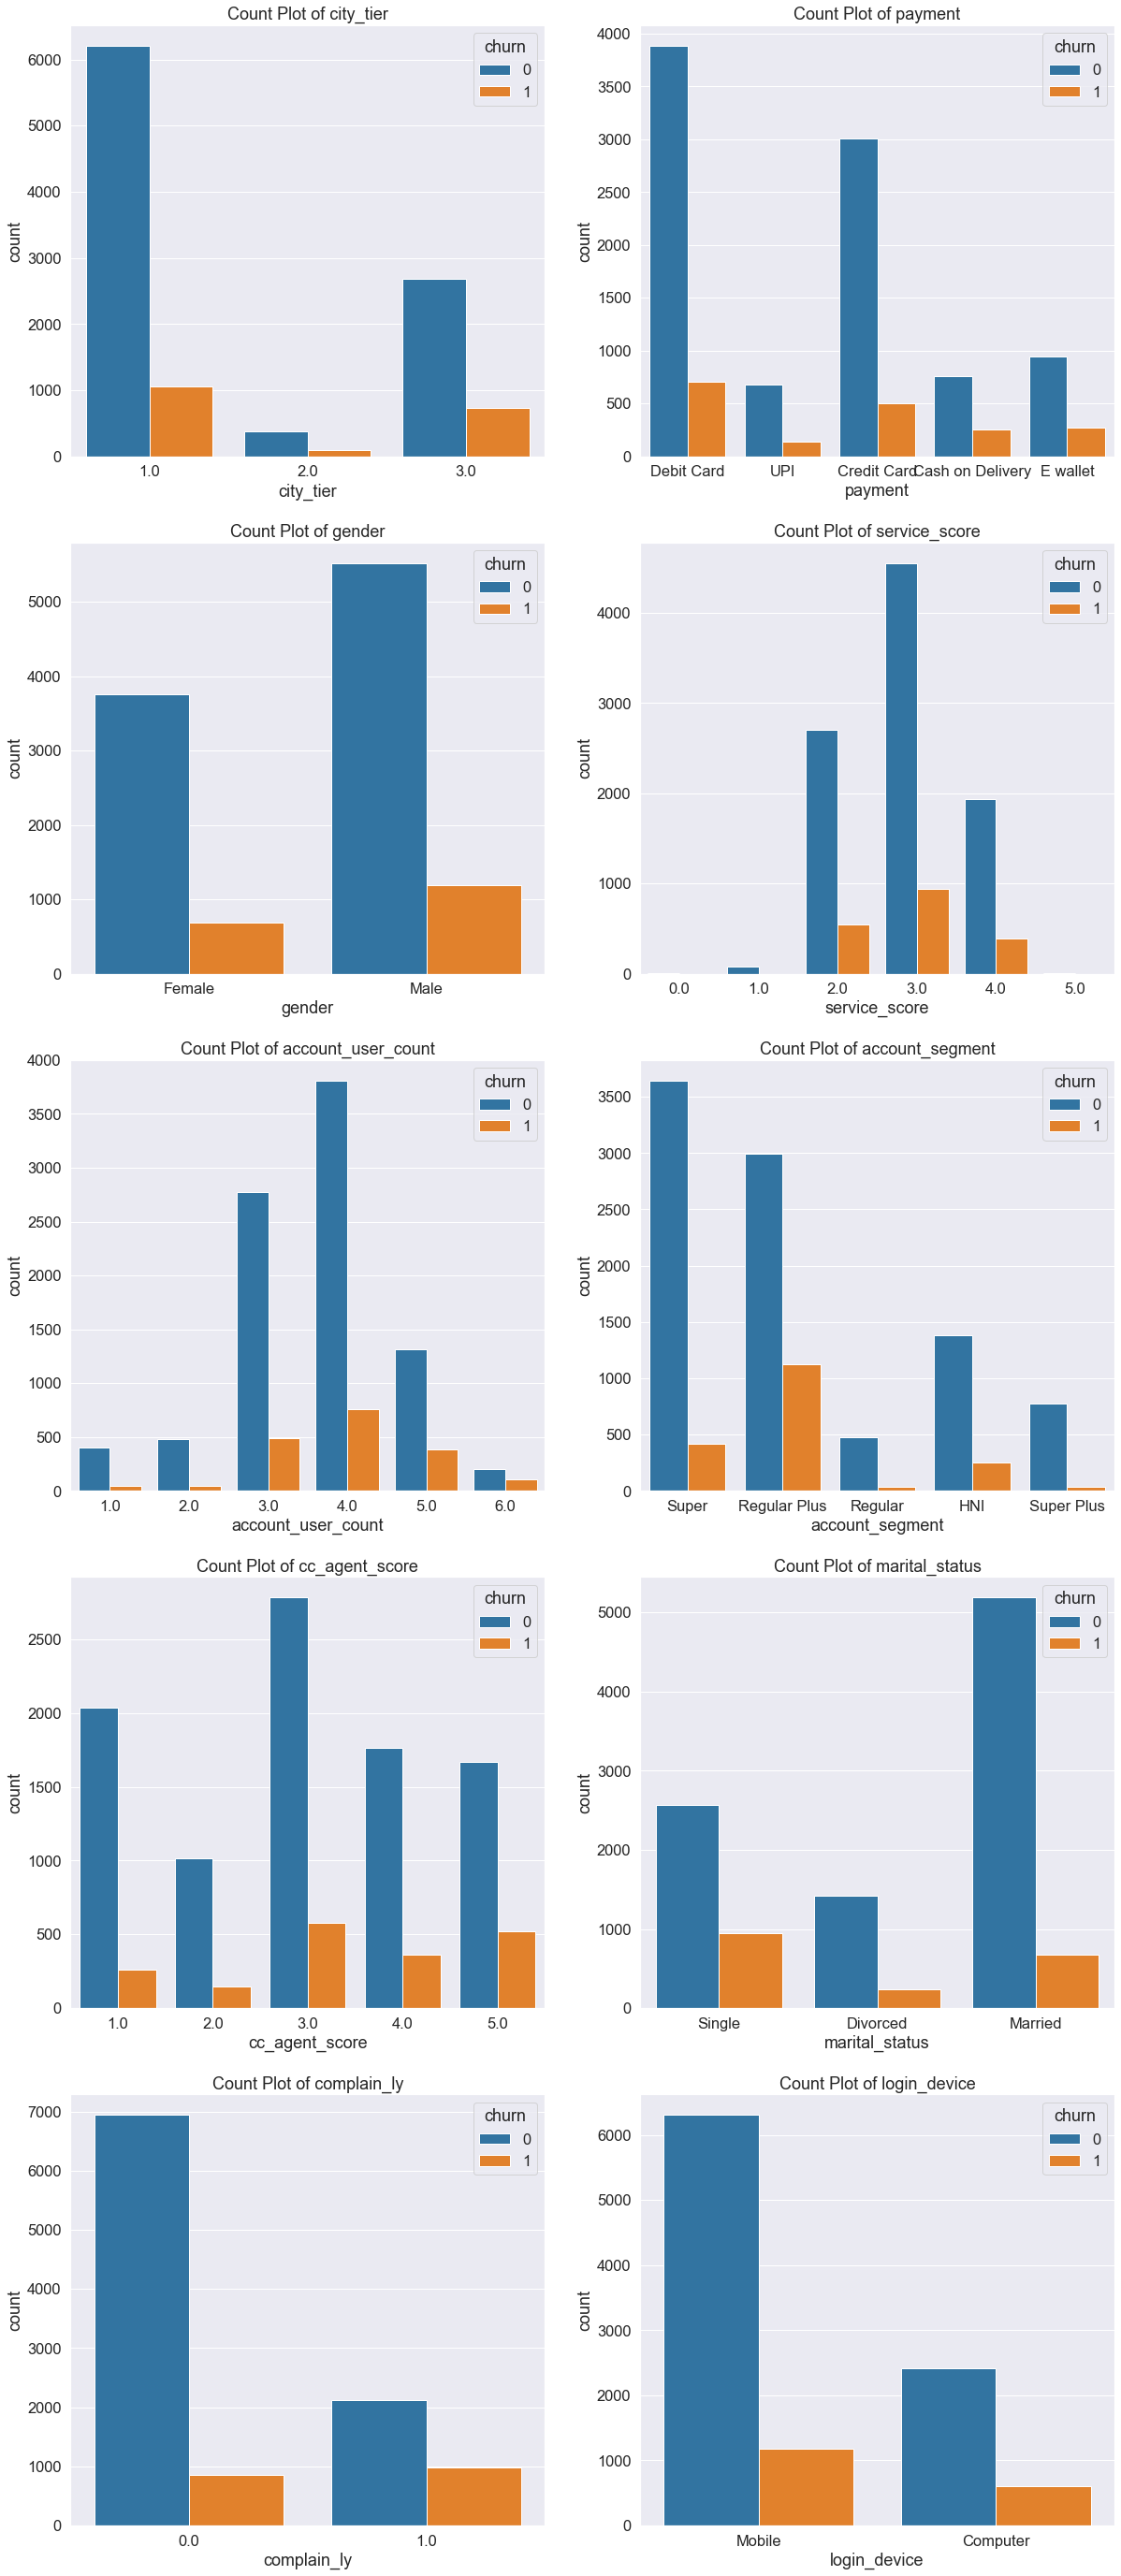

In [37]:
plt.figure(figsize=(20,100))
j=1
for i in cat:
    plt.subplot(10,2,j)
    sns.countplot(df[i],hue=df.churn);
    plt.title('Count Plot of '+i)
    j=j+1

In [38]:
for i in cat:
    print('Churn Percentage in Sub Levels of',i)
    display(pd.crosstab(columns=df[i],index=df.churn,normalize=1).round(3)*100)
    print('-------------------------------')

Churn Percentage in Sub Levels of city_tier


city_tier,1.0,2.0,3.0
churn,,,
0,85.5,80.0,78.6
1,14.5,20.0,21.4


-------------------------------
Churn Percentage in Sub Levels of payment


payment,Cash on Delivery,Credit Card,Debit Card,E wallet,UPI
churn,,,,,
0,75.0,85.8,84.7,77.3,82.6
1,25.0,14.2,15.3,22.7,17.4


-------------------------------
Churn Percentage in Sub Levels of gender


gender,Female,Male
churn,,
0,84.5,82.3
1,15.5,17.7


-------------------------------
Churn Percentage in Sub Levels of service_score


service_score,0.0,1.0,2.0,3.0,4.0,5.0
churn,,,,,,
0,100.0,100.0,83.1,83.0,83.1,100.0
1,0.0,0.0,16.9,17.0,16.9,0.0


-------------------------------
Churn Percentage in Sub Levels of account_user_count


account_user_count,1.0,2.0,3.0,4.0,5.0,6.0
churn,,,,,,
0,90.1,90.9,85.0,83.4,77.5,65.4
1,9.9,9.1,15.0,16.6,22.5,34.6


-------------------------------
Churn Percentage in Sub Levels of account_segment


account_segment,HNI,Regular,Regular Plus,Super,Super Plus
churn,,,,,
0,84.4,92.3,72.7,89.8,95.1
1,15.6,7.7,27.3,10.2,4.9


-------------------------------
Churn Percentage in Sub Levels of cc_agent_score


cc_agent_score,1.0,2.0,3.0,4.0,5.0
churn,,,,,
0,88.5,87.4,82.8,82.9,76.2
1,11.5,12.6,17.2,17.1,23.8


-------------------------------
Churn Percentage in Sub Levels of marital_status


marital_status,Divorced,Married,Single
churn,,,
0,85.4,88.5,73.1
1,14.6,11.5,26.9


-------------------------------
Churn Percentage in Sub Levels of complain_ly


complain_ly,0.0,1.0
churn,,
0,89.1,68.2
1,10.9,31.8


-------------------------------
Churn Percentage in Sub Levels of login_device


login_device,Computer,Mobile
churn,,
0,80.2,84.3
1,19.8,15.7


-------------------------------


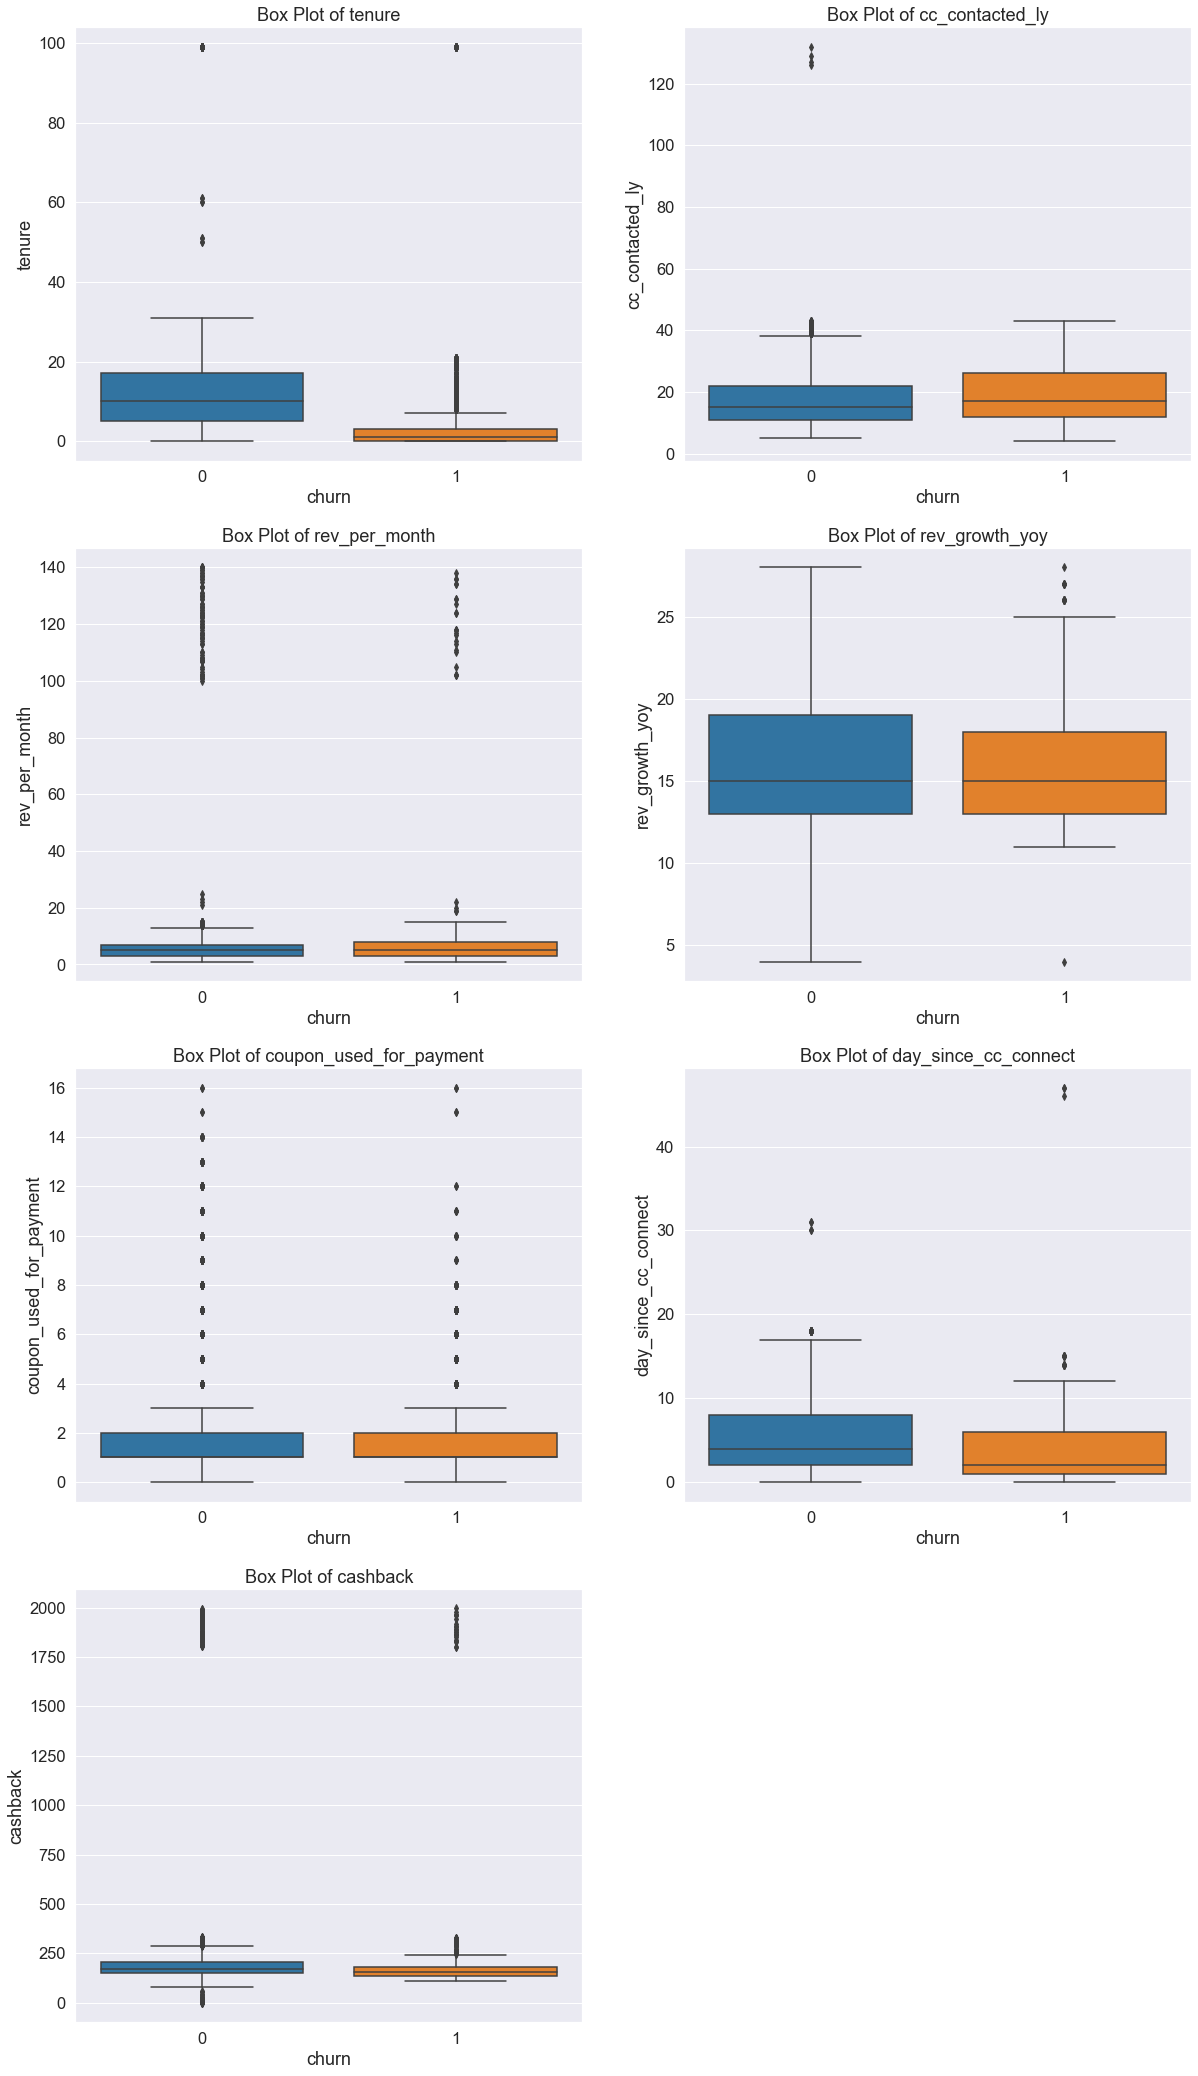

In [39]:
plt.figure(figsize=(20,75));
j=1
for i in num:
    plt.subplot(8,2,j);
    sns.boxplot(x=df.churn, y=df[i]);
    plt.title('Box Plot of '+i);
    j=j+1

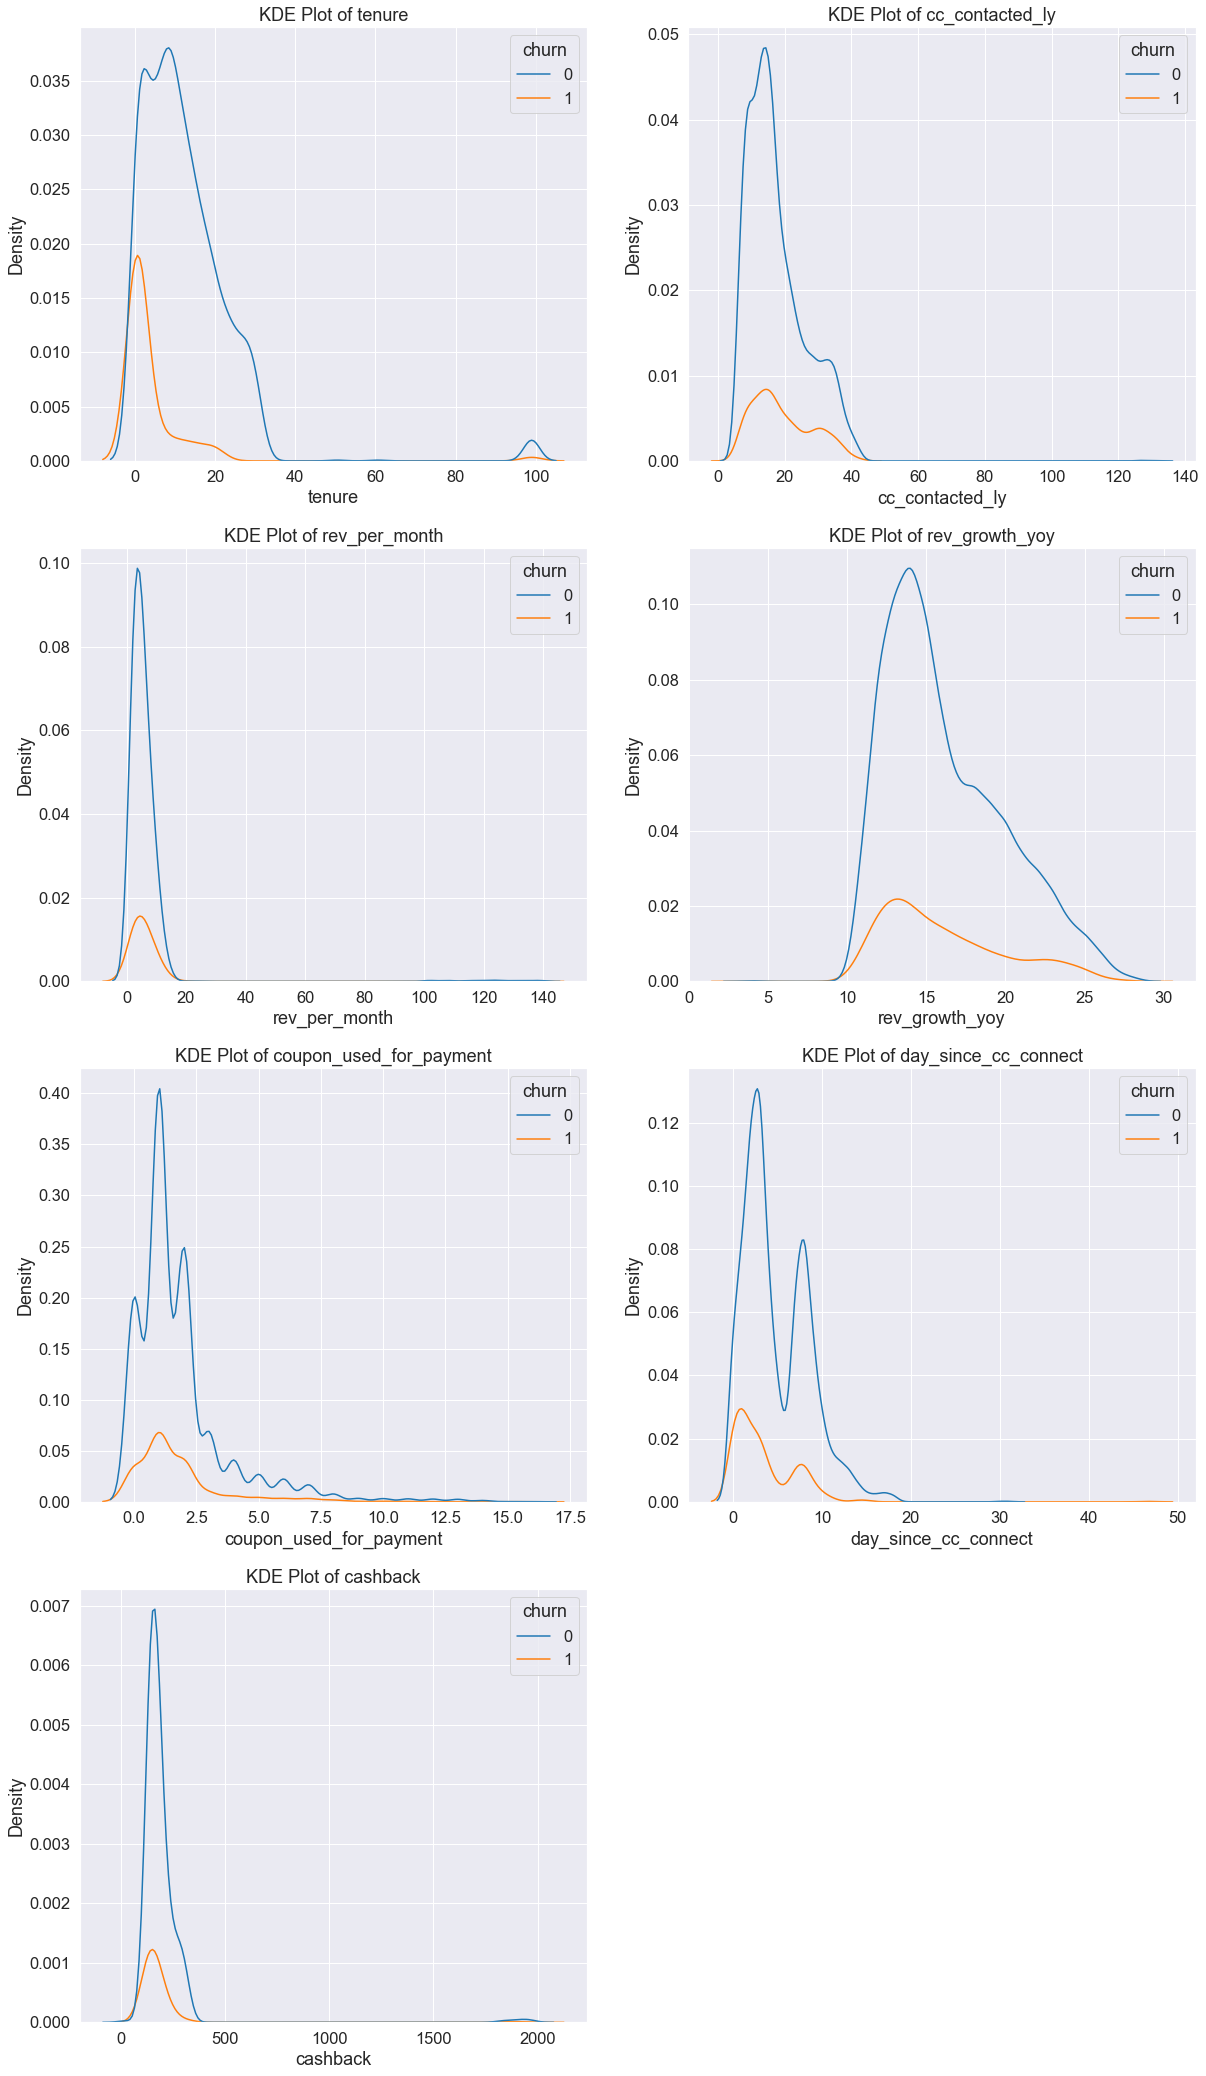

In [40]:
plt.figure(figsize=(20,75));
j=1
for i in num:
    plt.subplot(8,2,j);
    sns.kdeplot(hue=df.churn, x=df[i]);
    plt.title('KDE Plot of '+i);
    j=j+1

In [41]:
df[df.churn==0].describe()['tenure']

count    9194.000000
mean       12.371329
std        12.614520
min         0.000000
25%         5.000000
50%        10.000000
75%        17.000000
max        99.000000
Name: tenure, dtype: float64

In [42]:
df[df.churn==1].describe()['tenure']

count    1848.000000
mean        4.327381
std        12.071994
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        99.000000
Name: tenure, dtype: float64

In [43]:
df[df.churn==0].describe()['day_since_cc_connect']

count    9070.000000
mean        4.879052
std         3.664481
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        31.000000
Name: day_since_cc_connect, dtype: float64

In [44]:
df[df.churn==1].describe()['day_since_cc_connect']

count    1832.000000
mean        3.415939
std         3.620369
min         0.000000
25%         1.000000
50%         2.000000
75%         6.000000
max        47.000000
Name: day_since_cc_connect, dtype: float64

In [45]:
num1 = ['tenure',
 'cc_contacted_ly',
 'rev_per_month',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'day_since_cc_connect',
 'cashback','churn']

In [46]:
df[num1].groupby('churn').median().round(1).T

churn,0,1
tenure,10.0,1.0
cc_contacted_ly,15.0,17.0
rev_per_month,5.0,5.0
rev_growth_yoy,15.0,15.0
coupon_used_for_payment,1.0,1.0
day_since_cc_connect,4.0,2.0
cashback,168.3,152.7


In [47]:
#df.groupby('churn').median().round(1).T.to_excel('medians.xlsx')

In [48]:
#sns.pairplot(df[num1],hue='churn');

In [49]:
df[num].corr().round(2)

,tenure,cc_contacted_ly,rev_per_month,rev_growth_yoy,coupon_used_for_payment,day_since_cc_connect,cashback
tenure,1.00,-0.00,0.03,0.02,0.09,0.12,0.08
cc_contacted_ly,-0.00,1.00,0.02,0.07,0.00,0.01,0.00
rev_per_month,0.03,0.02,1.00,0.02,0.02,-0.00,0.00
rev_growth_yoy,0.02,0.07,0.02,1.00,0.02,0.00,-0.00
coupon_used_for_payment,0.09,0.00,0.02,0.02,1.00,0.36,0.07
day_since_cc_connect,0.12,0.01,-0.00,0.00,0.36,1.00,0.08
cashback,0.08,0.00,0.00,-0.00,0.07,0.08,1.00


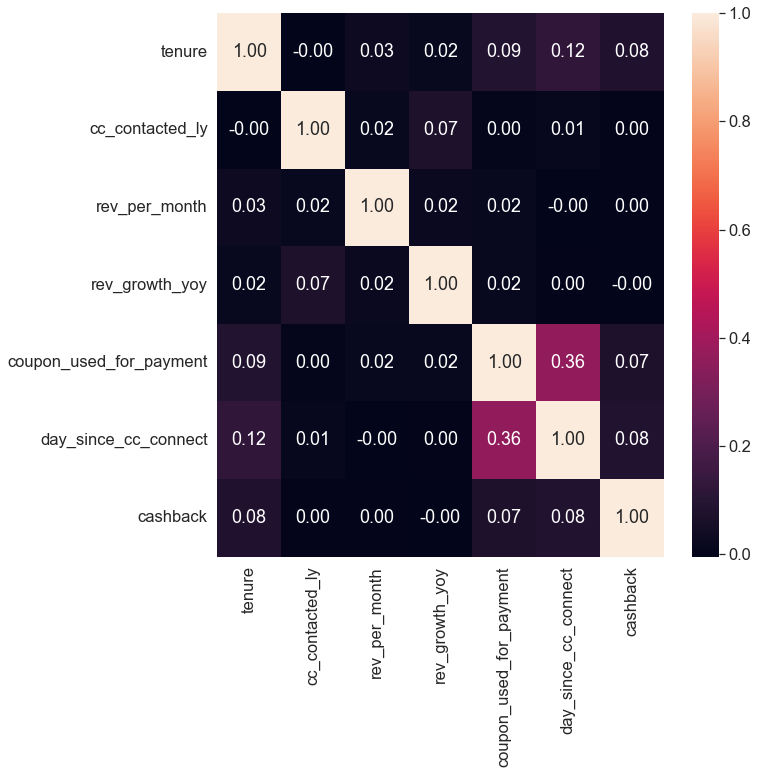

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num].corr(),annot=True,fmt='.2f');

## Multivariate Analysis

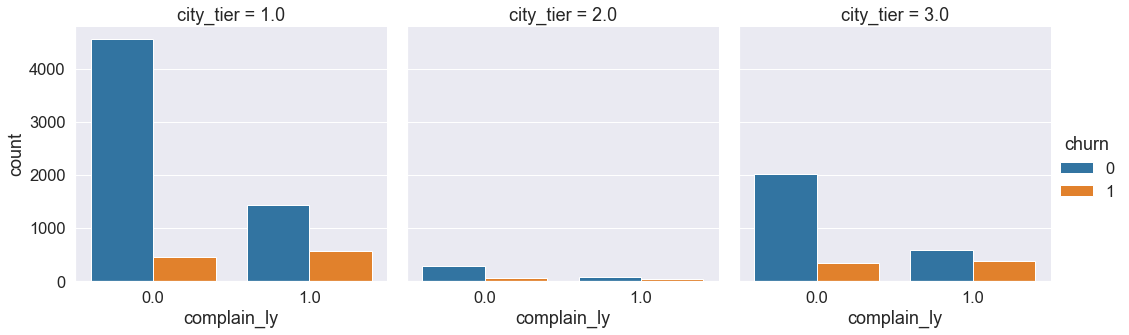

In [51]:
sns.catplot(x='complain_ly',col='city_tier',kind="count",hue='churn',data=df);

In [52]:
pd.crosstab(columns=[df.city_tier,df.complain_ly],index=df.churn,normalize=1).round(2)*100

city_tier     1.0         2.0         3.0      
complain_ly   0.0   1.0   0.0   1.0   0.0   1.0
churn                                          
0            91.0  72.0  85.0  67.0  86.0  61.0
1             9.0  28.0  15.0  33.0  14.0  39.0

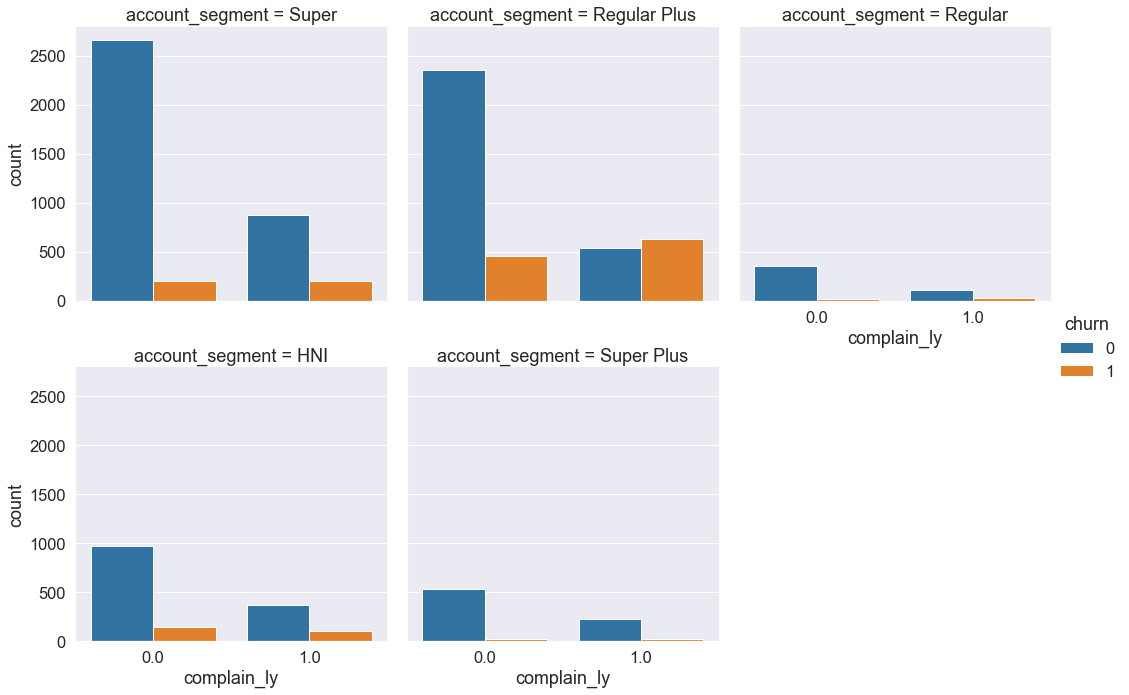

In [53]:
sns.catplot(x='complain_ly',col='account_segment',kind="count",hue='churn',data=df,col_wrap=3);

In [54]:
pd.crosstab(columns=[df.account_segment,df.complain_ly],index=df.churn,normalize=1).round(2)*100

account_segment   HNI       Regular       Regular Plus       Super        \
complain_ly       0.0   1.0     0.0   1.0          0.0   1.0   0.0   1.0   
churn                                                                      
0                87.0  79.0    96.0  81.0         84.0  46.0  93.0  81.0   
1                13.0  21.0     4.0  19.0         16.0  54.0   7.0  19.0   

account_segment Super Plus        
complain_ly            0.0   1.0  
churn                             
0                     97.0  90.0  
1                      3.0  10.0

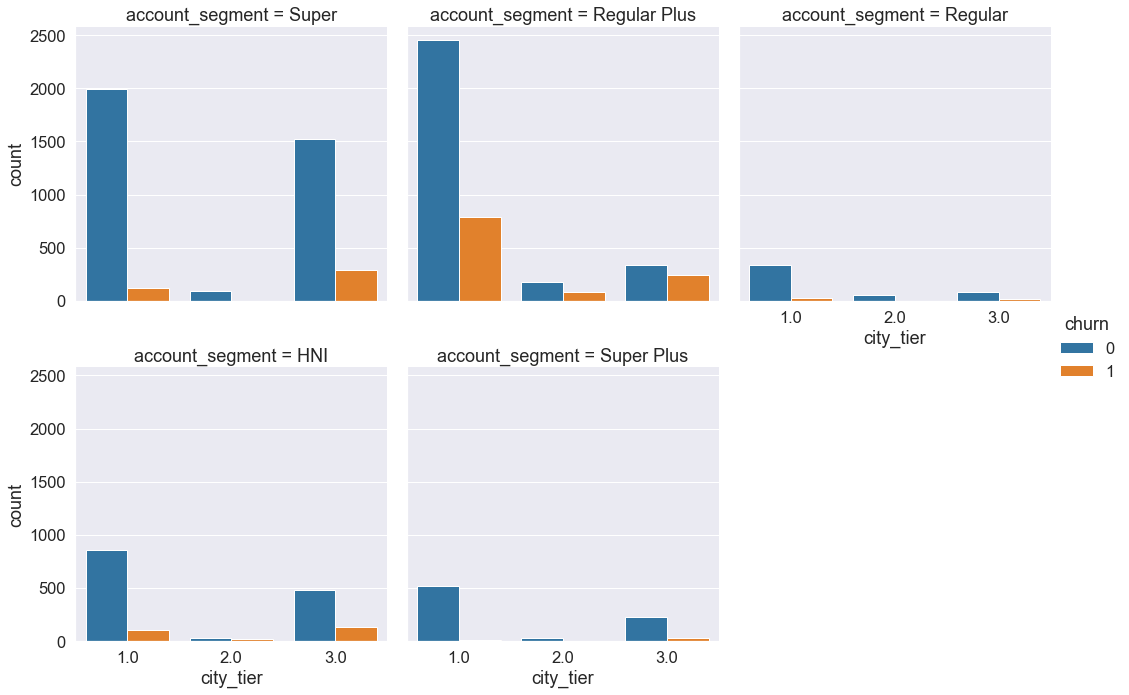

In [55]:
sns.catplot(x='city_tier',col='account_segment',kind="count",hue='churn',data=df,col_wrap=3);

In [56]:
pd.crosstab(columns=[df.account_segment,df.city_tier],index=df.churn,normalize=1).round(3)*100

account_segment   HNI             Regular              Regular Plus        \
city_tier         1.0   2.0   3.0     1.0    2.0   3.0          1.0   2.0   
churn                                                                       
0                89.2  66.0  78.4    93.7  100.0  83.8         75.6  69.0   
1                10.8  34.0  21.6     6.3    0.0  16.2         24.4  31.0   

account_segment       Super              Super Plus               
city_tier         3.0   1.0    2.0   3.0        1.0    2.0   3.0  
churn                                                             
0                57.8  94.4  100.0  83.9       98.5  100.0  87.5  
1                42.2   5.6    0.0  16.1        1.5    0.0  12.5

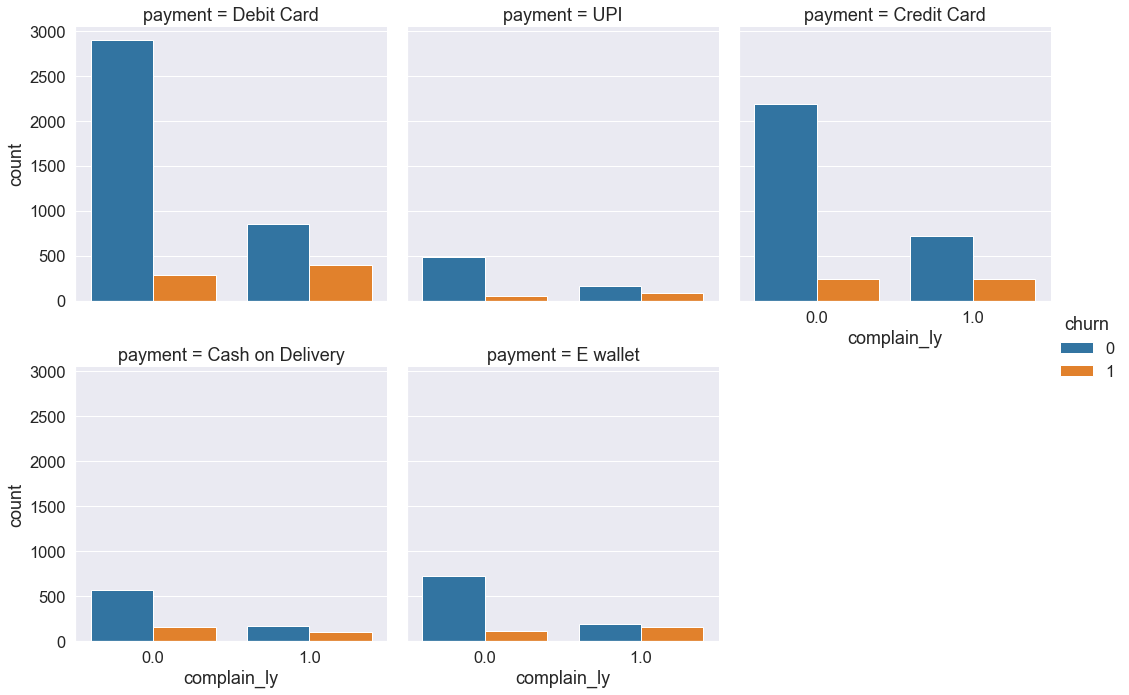

In [57]:
sns.catplot(x='complain_ly',col='payment',kind="count",hue='churn',data=df,col_wrap=3);

In [58]:
pd.crosstab(columns=[df.payment,df.complain_ly],index=df.churn,normalize=1).round(3)*100

payment     Cash on Delivery       Credit Card       Debit Card        \
complain_ly              0.0   1.0         0.0   1.0        0.0   1.0   
churn                                                                   
0                       78.8  63.5        90.2  74.7       91.0  68.4   
1                       21.2  36.5         9.8  25.3        9.0  31.6   

payment     E wallet         UPI        
complain_ly      0.0   1.0   0.0   1.0  
churn                                   
0               87.1  54.3  90.5  66.1  
1               12.9  45.7   9.5  33.9

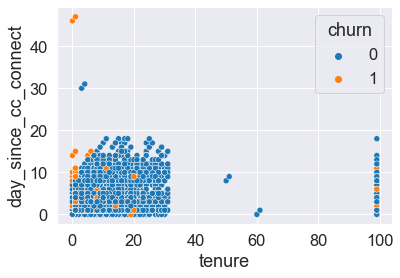

In [59]:
sns.scatterplot(df.tenure,df.day_since_cc_connect,hue=df.churn);

# Q3. Data Cleaning and Pre-processing

## Missing Value treatment

In [60]:
a = pd.DataFrame(df.isnull().sum().sort_values(ascending = False),columns=['Number_of_Null_Values'])
a = a.rename_axis(index='Features')
a['Percentage_of_Null_Values']=a['Number_of_Null_Values']/df.shape[0]*100
a[a.Number_of_Null_Values>0].round(1)

,Number_of_Null_Values,Percentage_of_Null_Values
Features,,
rev_per_month,791,7.0
login_device,760,6.7
cashback,473,4.2
account_user_count,444,3.9
day_since_cc_connect,358,3.2
complain_ly,357,3.2
tenure,218,1.9
marital_status,212,1.9
cc_agent_score,116,1.0


In [61]:
# a.to_excel('null.xlsx')

In [62]:
for i in cat:
    df[i]=df[i].fillna(df[i].mode()[0])

In [63]:
for i in num:
    df[i]=df[i].fillna(df[i].median())

In [64]:
a = pd.DataFrame(df.isnull().sum().sort_values(ascending = False),columns=['Number_of_Null_Values'])
a = a.rename_axis(index='Features')
a['Percentage_of_Null_Values']=a['Number_of_Null_Values']/df.shape[0]*100
a.round(1)

,Number_of_Null_Values,Percentage_of_Null_Values
Features,,
churn,0,0.0
tenure,0,0.0
cashback,0,0.0
day_since_cc_connect,0,0.0
coupon_used_for_payment,0,0.0
rev_growth_yoy,0,0.0
complain_ly,0,0.0
rev_per_month,0,0.0
marital_status,0,0.0


## Outlier Treatment

### Checking Outliers

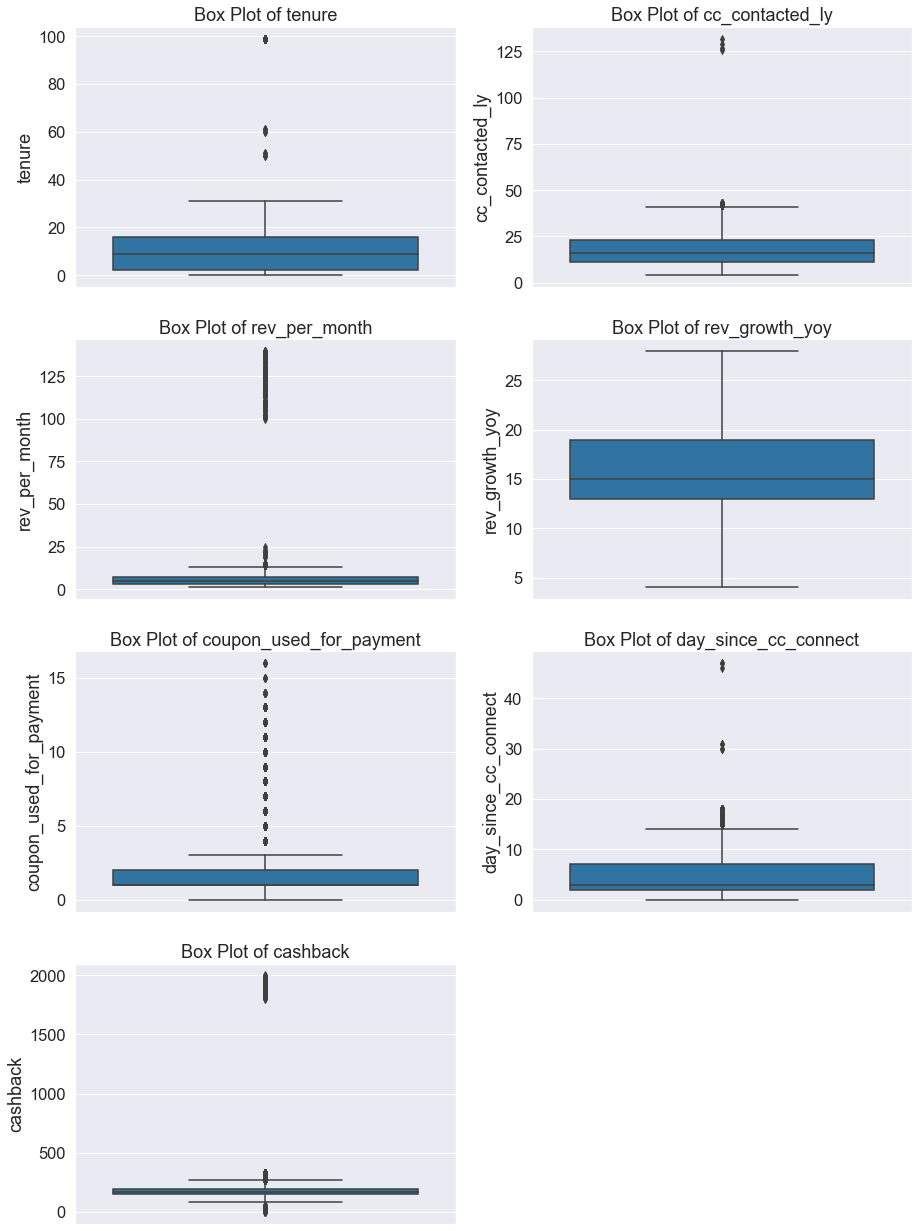

In [65]:
plt.figure(figsize=(15,45))
j=1
for i in num:
    plt.subplot(8,2,j);
    sns.boxplot(y=df[i]);
    plt.title('Box Plot of '+i);
    j=j+1

In [66]:
q1=df[num].quantile(0.25)
q3=df[num].quantile(0.75)
iqr=q3-q1
ur=q3+1.5*iqr
lr=q1-1.5*iqr
a=pd.DataFrame(df[num][(df[num]<lr)|(df[num]>ur)].count().sort_values(ascending=False),columns=['No. of Outliers'])
a['Percentage of Outliers']=a['No. of Outliers']/df.shape[0]*100
a = a.rename_axis(index='Feature')
round(a,1)

,No. of Outliers,Percentage of Outliers
Feature,,
coupon_used_for_payment,1380,12.3
cashback,986,8.8
rev_per_month,185,1.6
tenure,139,1.2
day_since_cc_connect,130,1.2
cc_contacted_ly,42,0.4
rev_growth_yoy,0,0.0


In [67]:
# a.to_excel('outliers.xlsx')

### Outliers Treatment by Capping and Flooring Technique

In [68]:
for i in df[num].columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ur=q3+1.5*iqr
    lr=q1-1.5*iqr
    df[i]=np.where(df[i]>ur,ur,df[i])
    df[i]=np.where(df[i]<lr,lr,df[i])

In [69]:
q1=df[num].quantile(0.25)
q3=df[num].quantile(0.75)
iqr=q3-q1
ur=q3+1.5*iqr
lr=q1-1.5*iqr
a=pd.DataFrame(df[num][(df[num]<lr)|(df[num]>ur)].count().sort_values(ascending=False),columns=['No. of Outliers'])
a['Percentage of Outliers']=a['No. of Outliers']/df.shape[0]*100
a = a.rename_axis(index='Feature')
round(a,1)

,No. of Outliers,Percentage of Outliers
Feature,,
tenure,0,0.0
cc_contacted_ly,0,0.0
rev_per_month,0,0.0
rev_growth_yoy,0,0.0
coupon_used_for_payment,0,0.0
day_since_cc_connect,0,0.0
cashback,0,0.0


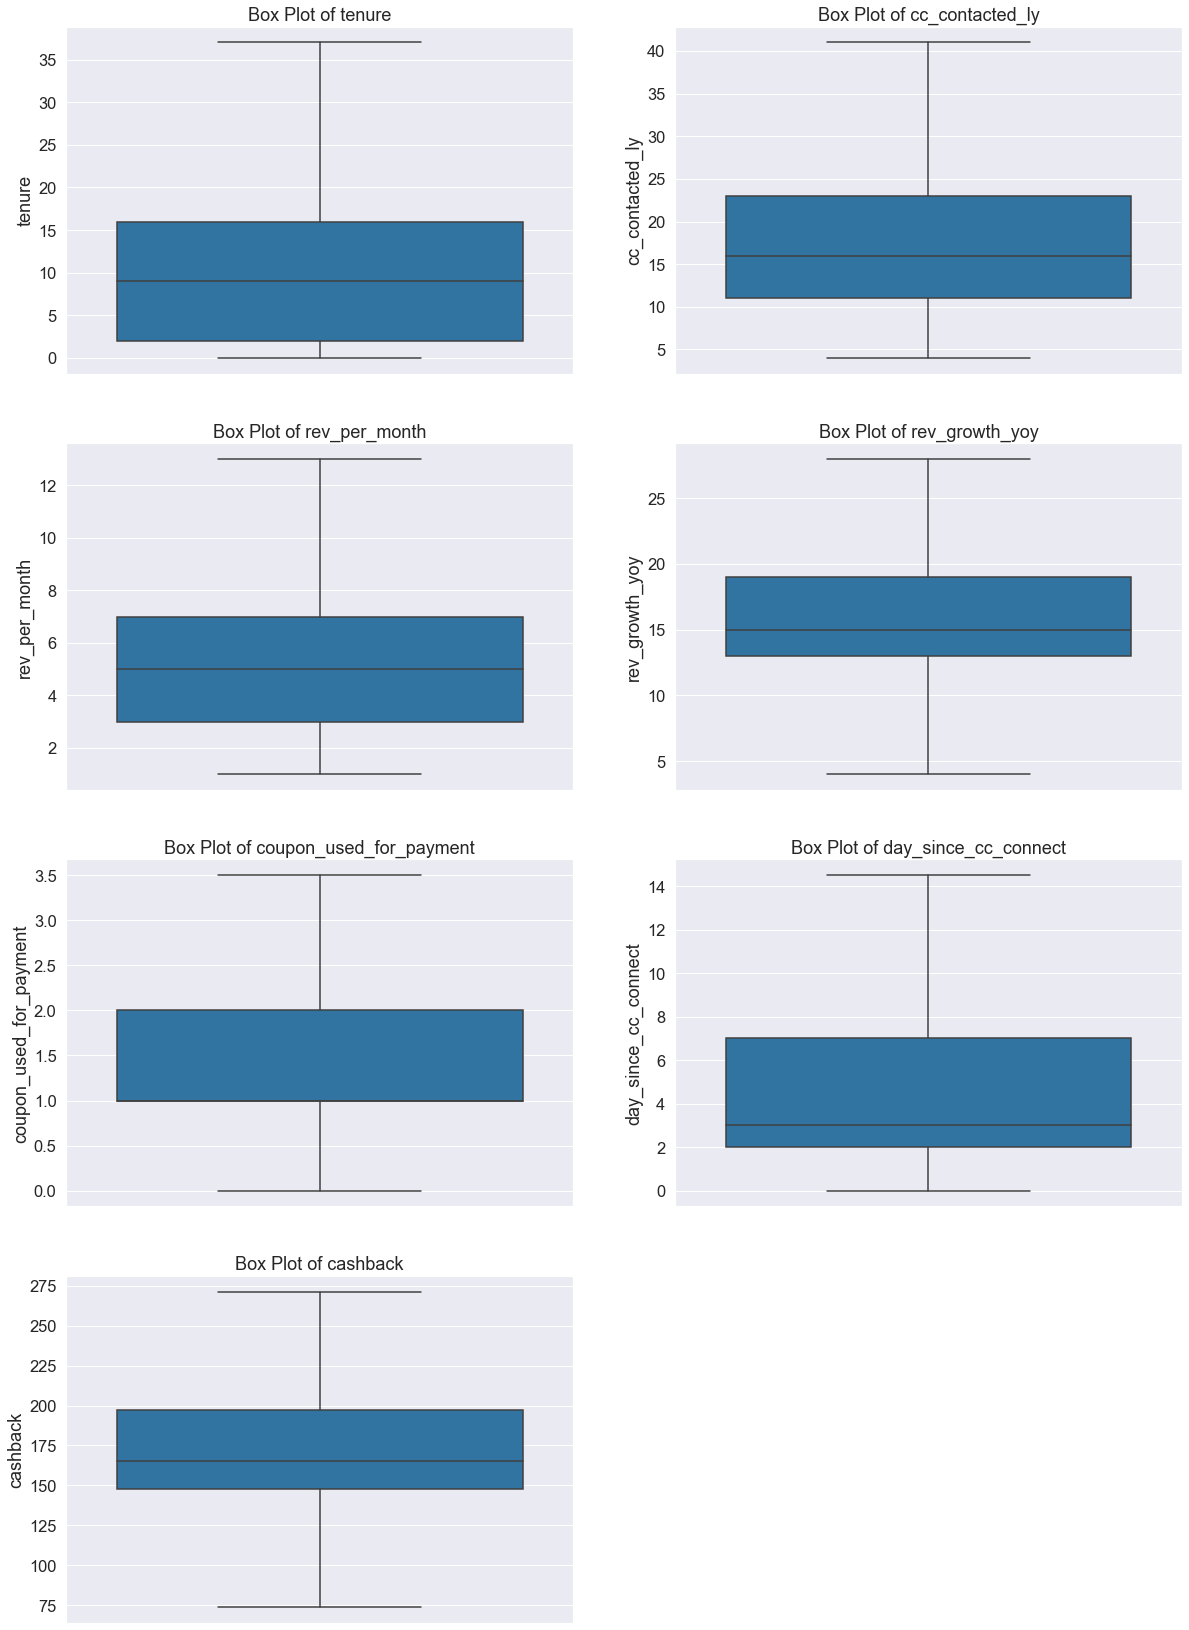

In [70]:
plt.figure(figsize=(20,60))
j=1
for i in num:
    plt.subplot(8,2,j);
    sns.boxplot(y=df[i]);
    plt.title('Box Plot of '+i);
    j=j+1

## Need for variable transformation (if any)

In [71]:
df.sample(10).T

,8141,1295,4705,82,5558,10699,5455,8557,4361,4269
churn,0,0,0,0,0,0,0,0,0,0
tenure,21.0,14.0,4.0,9.0,7.0,1.0,15.0,26.0,23.0,1.0
city_tier,1.0,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0
cc_contacted_ly,17.0,6.0,34.0,24.0,14.0,35.0,11.0,12.0,25.0,22.0
payment,Credit Card,Debit Card,E wallet,Credit Card,Debit Card,Debit Card,E wallet,Debit Card,Debit Card,Credit Card
gender,Male,Male,Male,Female,Male,Female,Female,Male,Male,Female
service_score,2.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0
account_user_count,4.0,3.0,4.0,3.0,4.0,2.0,4.0,5.0,4.0,4.0
account_segment,Super Plus,Regular Plus,Super,Regular Plus,Super,Regular Plus,HNI,Regular,Super,Regular Plus
cc_agent_score,1.0,1.0,1.0,2.0,3.0,1.0,3.0,3.0,1.0,1.0


In [72]:
df.account_segment=df.account_segment.replace(['Regular', 'Regular Plus','Super', 'Super Plus', 'HNI'],
                                             [0,1,2,3,4])

In [73]:
df.iloc[:,[4,5,8,10,17]].sample(10).T

,5326,1628,7318,3689,4709,839,3523,6989,4942,8284
payment,Credit Card,Cash on Delivery,E wallet,UPI,Credit Card,Credit Card,Debit Card,Debit Card,UPI,Credit Card
gender,Male,Male,Female,Female,Female,Female,Male,Male,Male,Male
account_segment,3,2,2,3,2,2,1,1,2,2
marital_status,Married,Married,Married,Divorced,Single,Single,Divorced,Single,Married,Single
login_device,Computer,Mobile,Mobile,Mobile,Mobile,Mobile,Mobile,Mobile,Mobile,Mobile


In [74]:
x=df.drop('churn',axis=1)
y=df.churn

In [75]:
x.sample(10).T

,6019,8516,6139,70,10960,1462,2317,3180,4600,2977
tenure,0.0,9.0,0.0,10.0,1.0,9.0,0.0,12.0,1.0,12.0
city_tier,1.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0
cc_contacted_ly,12.0,12.0,16.0,27.0,14.0,17.0,7.0,7.0,30.0,30.0
payment,Debit Card,Credit Card,UPI,Debit Card,Credit Card,Cash on Delivery,Debit Card,Debit Card,UPI,Debit Card
gender,Male,Female,Male,Male,Male,Female,Female,Female,Female,Male
service_score,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
account_user_count,3.0,4.0,3.0,2.0,4.0,3.0,3.0,4.0,4.0,4.0
account_segment,1,2,2,1,1,4,1,1,4,2
cc_agent_score,5.0,4.0,3.0,5.0,1.0,1.0,1.0,5.0,5.0,2.0
marital_status,Single,Single,Divorced,Divorced,Single,Married,Single,Single,Married,Married


In [76]:
y.sample(10)

5824    0
1816    0
3065    0
319     0
7676    0
3606    0
777     0
6798    0
8385    0
1698    0
Name: churn, dtype: int64

## For Tree Based Models

In [77]:
xencoded = x.copy()

In [78]:
xencoded.payment.unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'],
      dtype=object)

In [79]:
for i in xencoded.columns:
    if xencoded[i].dtype == 'object':
        print('***********************************************')
        print('Feature:',i)
        print(xencoded[i].unique())
        print(pd.Categorical(xencoded[i].unique()).codes)
        pd.Categorical(xencoded[i])
        xencoded[i] = pd.Categorical(xencoded[i]).codes

***********************************************
Feature: payment
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']
[2 4 1 0 3]
***********************************************
Feature: gender
['Female' 'Male']
[0 1]
***********************************************
Feature: marital_status
['Single' 'Divorced' 'Married']
[2 0 1]
***********************************************
Feature: login_device
['Mobile' 'Computer']
[1 0]


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
xtrain, xtest, ytrain, ytest = train_test_split(xencoded, y, test_size=0.3, random_state=1)

In [82]:
xtrain.head(5).T

,7580,5198,1929,3427,6249
tenure,11.00,22.00,15.00,15.00,0.00
city_tier,1.00,3.00,1.00,1.00,1.00
cc_contacted_ly,22.00,14.00,14.00,14.00,22.00
payment,2.00,3.00,2.00,1.00,1.00
gender,1.00,1.00,1.00,0.00,0.00
service_score,0.00,4.00,3.00,3.00,3.00
account_user_count,4.00,4.00,3.00,4.00,5.00
account_segment,2.00,2.00,0.00,2.00,2.00
cc_agent_score,5.00,5.00,1.00,3.00,4.00
marital_status,1.00,1.00,1.00,2.00,0.00


In [83]:
xtest.head(5).T

,784,6943,3709,6439,5310
tenure,0.00,0.0,10.00,0.00,9.00
city_tier,1.00,3.0,3.00,1.00,1.00
cc_contacted_ly,31.00,22.0,23.00,10.00,25.00
payment,2.00,3.0,3.00,1.00,2.00
gender,0.00,1.0,0.00,0.00,1.00
service_score,2.00,2.0,4.00,2.00,3.00
account_user_count,1.00,3.0,5.00,3.00,2.00
account_segment,1.00,1.0,2.00,1.00,2.00
cc_agent_score,2.00,5.0,5.00,4.00,5.00
marital_status,2.00,1.0,0.00,2.00,1.00


### Distribution of Target Variable Classes in Train and Test Datasets  

In [84]:
y.value_counts(normalize=True)

0    0.831616
1    0.168384
Name: churn, dtype: float64

In [85]:
ytrain.value_counts(normalize=True)

0    0.831769
1    0.168231
Name: churn, dtype: float64

In [86]:
ytest.value_counts(normalize=True)

0    0.831261
1    0.168739
Name: churn, dtype: float64

## Variables removed or added and why (if any)

### Chi-Square Test

In [87]:
from scipy.stats import chi2_contingency

In [88]:
p_values_chi_square=[]
for i in cat:
    chi2, p_value, dof, exp_freq = chi2_contingency(pd.crosstab(index=df[i],columns=df.churn), 
                                                correction = False)
    p_values_chi_square.append(p_value)
results_chi_square = pd.DataFrame(p_values_chi_square,index=cat,columns=['p_values of Chi Square Test']).round(6)
results_chi_square

,p_values of Chi Square Test
city_tier,0.000000
payment,0.000000
gender,0.002006
service_score,0.002483
account_user_count,0.000000
account_segment,0.000000
cc_agent_score,0.000000
marital_status,0.000000
complain_ly,0.000000
login_device,0.000000


In [89]:
#results_chi_square.to_excel('results_chi_square.xlsx')

### Multicollinearity - VIF

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
ss=StandardScaler()

In [92]:
xscaled = x.copy()

In [93]:
xscaled[num]=ss.fit_transform(xscaled[num])

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

In [95]:
calc_vif(xscaled[num]).sort_values(by = 'VIF', ascending = False).head().round(1)

,variables,VIF
6,cashback,1.4
5,day_since_cc_connect,1.3
0,tenure,1.3
4,coupon_used_for_payment,1.2
2,rev_per_month,1.1


## Checking class imbalance in the target variable

In [96]:
df.churn.value_counts(normalize=True).round(3)*100

0    83.2
1    16.8
Name: churn, dtype: float64

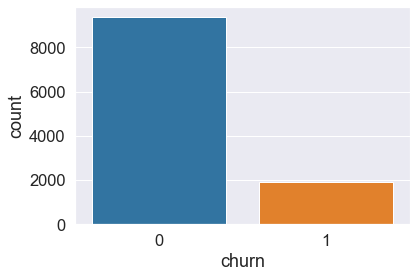

In [97]:
sns.countplot(df.churn);

# Q4. Model building

In [98]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,roc_curve

In [99]:
xgbm = XGBClassifier(random_state=1)

In [100]:
xgbm.fit(xtrain,ytrain)

[18:27:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
ytrain_pred = xgbm.predict(xtrain)

In [102]:
print(classification_report(ytrain,ytrain_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [103]:
ytest_pred = xgbm.predict(xtest)

In [104]:
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2808
           1       0.96      0.86      0.91       570

    accuracy                           0.97      3378
   macro avg       0.97      0.93      0.95      3378
weighted avg       0.97      0.97      0.97      3378



# Effort to improve model performance.

### Using GridsearchCV for Extreme Gradient Boosting

In [105]:
# param_grid = {'n_estimators': [151,201,251],
#     'max_depth': [8,9,10]}

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
param_grid = {'n_estimators': [201],
     'max_depth': [9]}
xgbm = XGBClassifier(random_state=1)
gscv_xgbm = GridSearchCV(estimator = xgbm, param_grid = param_grid)

In [108]:
gscv_xgbm.fit(xtrain,ytrain)

[18:27:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:27:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:27:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:27:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=1, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
               

In [109]:
gscv_xgbm.best_params_

{'max_depth': 9, 'n_estimators': 201}

In [110]:
gscv_xgbm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=201, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Building Models - After Tuning Hyperparameters

In [111]:
xgbmf = gscv_xgbm.best_estimator_

In [112]:
xgbmf.fit(xtrain,ytrain)

[18:27:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=201, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
ytrain_pred = xgbmf.predict(xtrain)

In [114]:
print(classification_report(ytrain,ytrain_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [115]:
ytest_pred = xgbmf.predict(xtest)

In [116]:
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2808
           1       0.97      0.89      0.93       570

    accuracy                           0.98      3378
   macro avg       0.97      0.94      0.96      3378
weighted avg       0.98      0.98      0.98      3378



## Feature_Importances

### Extreme Gradient Boosting Model

In [117]:
fi_xgbmf=pd.DataFrame(xgbmf.feature_importances_,index=xtrain.columns,
columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False,
                                             key=abs).round(3)
fi_xgbmf

,Feature_Importances
tenure,0.188
complain_ly,0.170
account_segment,0.061
city_tier,0.060
cc_agent_score,0.057
day_since_cc_connect,0.054
marital_status,0.054
payment,0.049
rev_per_month,0.048
login_device,0.047


In [118]:
# fi_xgbmf.to_excel('fi_xgbmf.xlsx')

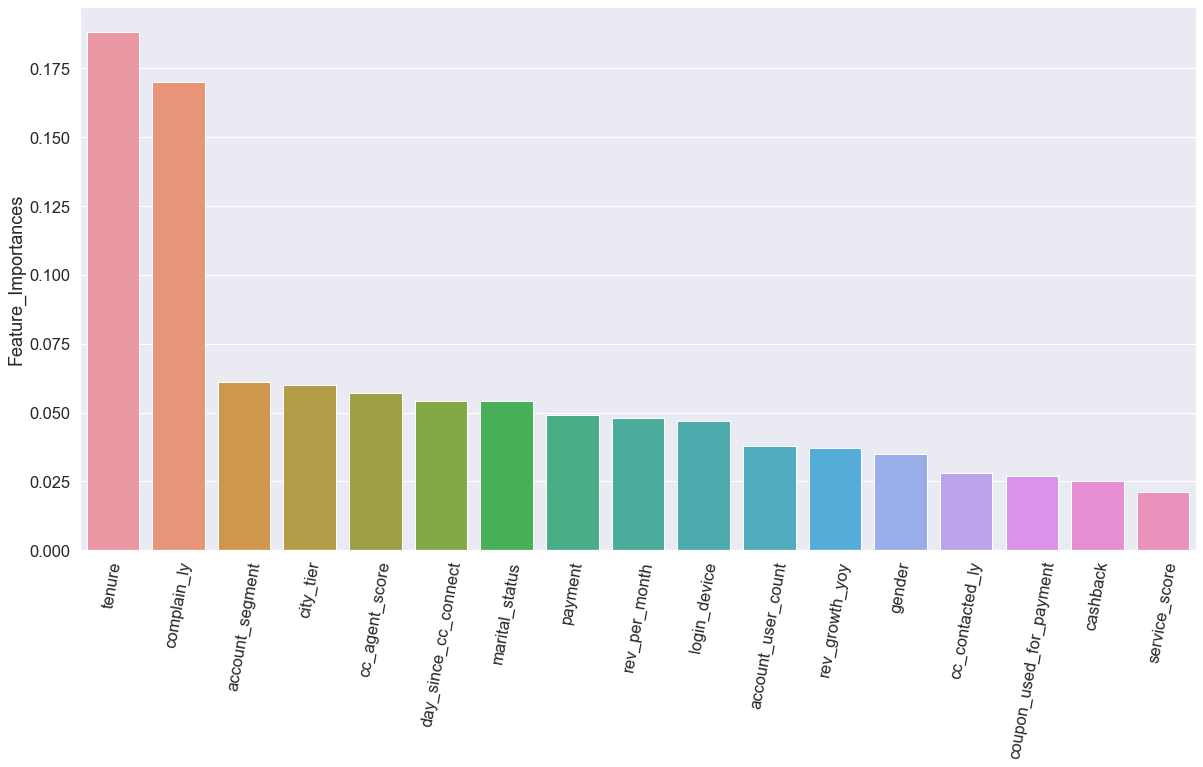

In [119]:
plt.figure(figsize=(20,10));
sns.barplot(fi_xgbmf.index,fi_xgbmf.Feature_Importances);
plt.xticks(rotation=80);

# Pickel File Creation

In [120]:
import pickle

In [121]:
pickle.dump(xgbmf,open("churn.pkl","wb"))
model = pickle.load(open("churn.pkl", "rb")) 

In [122]:
model.score(xtest, ytest)

0.9769094138543517

# Checking Versions of All Libraries

In [123]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

matplotlib==3.5.1
numpy==1.21.5
xgboost==1.5.2
pandas==1.4.2
scikit-learn==1.0.2
seaborn==0.11.2


In [124]:
from platform import python_version

print(python_version())

3.9.12
